In [ ]:
# Abhijeet Dhande & Akshay Pokale.
import tensorflow as tf
import matplotlib as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

Python version: 3.12.7
Tensorflow version: 2.19.0
Keras version: 3.9.0


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cache

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#Load the TensorBoard notebook extension
#%reLoad_ext tensorboard
%load_ext tensorboard

In [ ]:
#Clear any Logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print('x_train:', x_train.shape)

x_train: (60000, 28, 28)


In [ ]:
print('y_train:', y_train.shape)

y_train: (60000,)


In [ ]:
print('x_test:', x_test.shape)

x_test: (10000, 28, 28)


In [ ]:
print('y_test:', y_test.shape)

y_test: (10000,)


In [ ]:
#save image parameters to the constants that we will use later for data reshape
(_, IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:',IMAGE_WIDTH);
print('IMAGE_HEIGHT:',IMAGE_HEIGHT);
print('IMAGE_CHANNELS:',IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


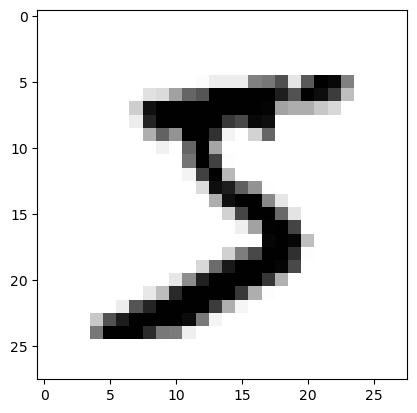

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

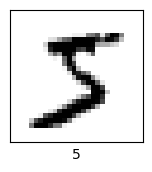

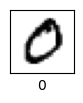

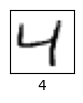

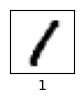

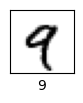

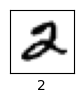

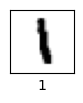

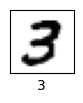

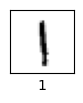

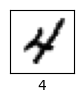

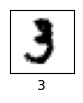

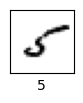

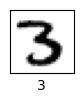

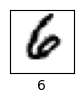

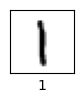

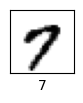

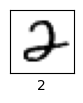

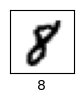

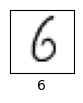

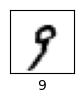

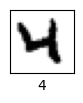

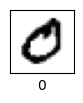

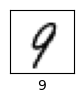

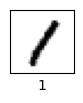

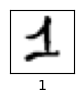

In [ ]:
numbers_to_display =25
num_cells= math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
 plt.subplot(num_cells, num_cells, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[i], cmap=plt.cm.binary)
 plt.xlabel(y_train[i])
 plt.show()

In [ ]:
x_train_with_chanels=x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels=x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:',x_train_with_chanels.shape)
print('x_test_with_chanels:',x_test_with_chanels.shape)



x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [ ]:
x_train_normalized=x_train_with_chanels/255
x_test_normalized=x_test_with_chanels/255


In [ ]:
#lets check just  one row from 0th image to see color channel value after
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,642 (818.91 KB)

 Trainable params: 209,642 (818.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


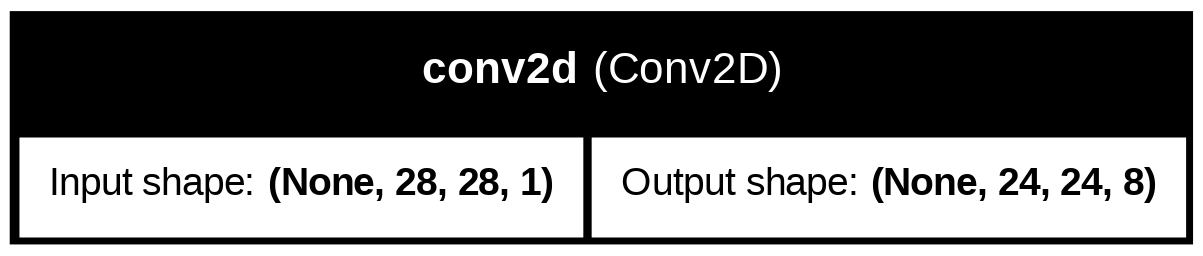

In [5]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Get the image dimensions from the training data
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape  # Assuming x_train is already loaded
IMAGE_CHANNELS = 1

# Model Definition
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
# ... (rest of your model definition)

# Plotting the Model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [8]:
import tensorflow as tf #Importing tensorflow module.
import datetime

# Model Definition (If not already defined in a previous cell)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(28, 28, 1),  # Assuming MNIST images are 28x28
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Load MNIST dataset (if not already loaded)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

training_history = model.fit(
    x_train,
    y_train,
    epochs=10, # This line was the problem, now correctly aligned
    validation_data=(x_test,y_test),
    callbacks=[tensorboard_callback]
)
# The repeated lines were removed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8142 - loss: 2.3127 - val_accuracy: 0.9723 - val_loss: 0.0893
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9625 - loss: 0.1286 - val_accuracy: 0.9842 - val_loss: 0.0562
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9763 - loss: 0.0818 - val_accuracy: 0.9808 - val_loss: 0.0638
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9791 - loss: 0.0694 - val_accuracy: 0.9855 - val_loss: 0.0496
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9824 - loss: 0.0607 - val_accuracy: 0.9870 - val_loss: 0.0530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9861 - loss: 0.0487 - val_accuracy: 0.9861 - val_loss: 0.0517
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9869 - loss: 0.0455 - val_accuracy: 0.9849 - val_loss: 0.0547
Epoch 8/10
1875/1875 ━━━━

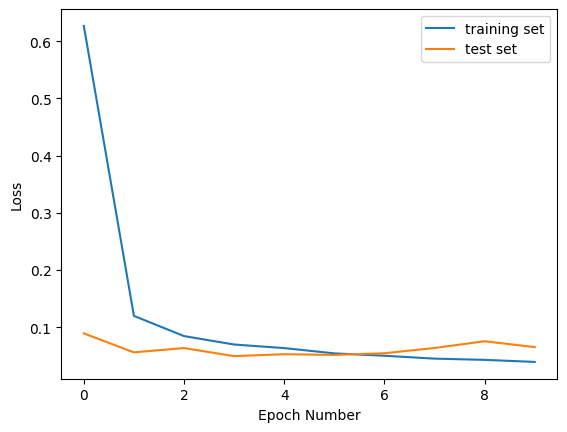

In [11]:
import matplotlib.pyplot as plt # Import the library and alias it as 'plt'

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

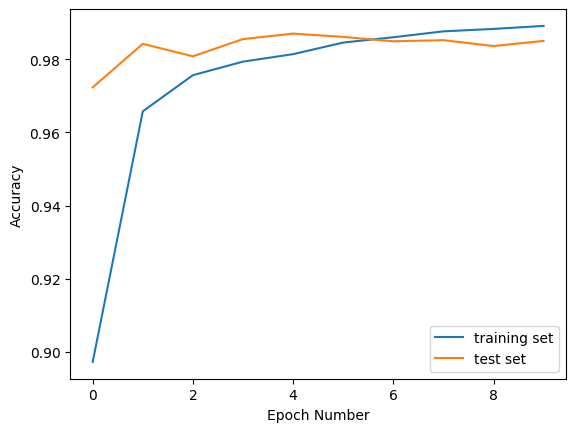

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()


In [16]:
%%capture
validation_loss, validation_accuracy=model.evaluate(x_train_normalized, y_train)


In [17]:
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)


Validation loss: 2.289675235748291
Validation accuracy: 0.16671666502952576


In [18]:
%%capture
train_loss, train_accuracy=model.evaluate(x_train_normalized, y_train)


In [19]:
print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

Training loss: 2.289675235748291
Training accuracy: 0.16671666502952576


In [20]:
model_name='digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [21]:
loaded_model=tf.keras.models.load_model(model_name)

In [22]:
loaded_model=tf.keras.models.load_model(model_name)

In [25]:
loaded_model = tf.keras.models.load_model(model_name)

# Assuming x_test_normalized contains your test data
# It seems x_test_normalized wasn't defined in the current session
# Let's load the MNIST dataset and normalize it
import tensorflow as tf

(_, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
IMAGE_WIDTH = 28  # Assuming MNIST images are 28x28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_normalized = x_test_with_chanels / 255

predictions_one_hot = loaded_model.predict(x_test_normalized)

print('predictions_one_hot:', predictions_one_hot.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
predictions_one_hot: (10000, 10)


In [28]:
import pandas as pd # Importing the pandas library

pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.097423,0.083410,0.111612,0.126718,0.085743,0.099586,0.071647,0.085623,0.128433,0.109805
1,0.100312,0.087796,0.115495,0.119973,0.085877,0.093933,0.075934,0.086029,0.129964,0.104687
2,0.101842,0.089908,0.113602,0.117111,0.086113,0.095053,0.076933,0.084617,0.129513,0.105309
3,0.104261,0.085423,0.111344,0.119068,0.085227,0.096612,0.076460,0.084901,0.131499,0.105204
4,0.096426,0.087643,0.113998,0.119272,0.088302,0.094337,0.073680,0.088311,0.130078,0.107953
...,...,...,...,...,...,...,...,...,...,...
9995,0.096330,0.085116,0.112045,0.122672,0.086656,0.098142,0.071439,0.088705,0.130266,0.108629
9996,0.097816,0.084202,0.108061,0.127836,0.085919,0.103530,0.071847,0.084891,0.125642,0.110256
9997,0.101975,0.086517,0.111486,0.118494,0.086823,0.095266,0.075915,0.085274,0.130824,0.107425
9998,0.099004,0.084075,0.112626,0.127924,0.082653,0.099234,0.073474,0.082069,0.131087,0.107855


In [32]:
predictions=np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,8
1,8
2,8
3,8
4,8
...,...
9995,8
9996,3
9997,8
9998,8


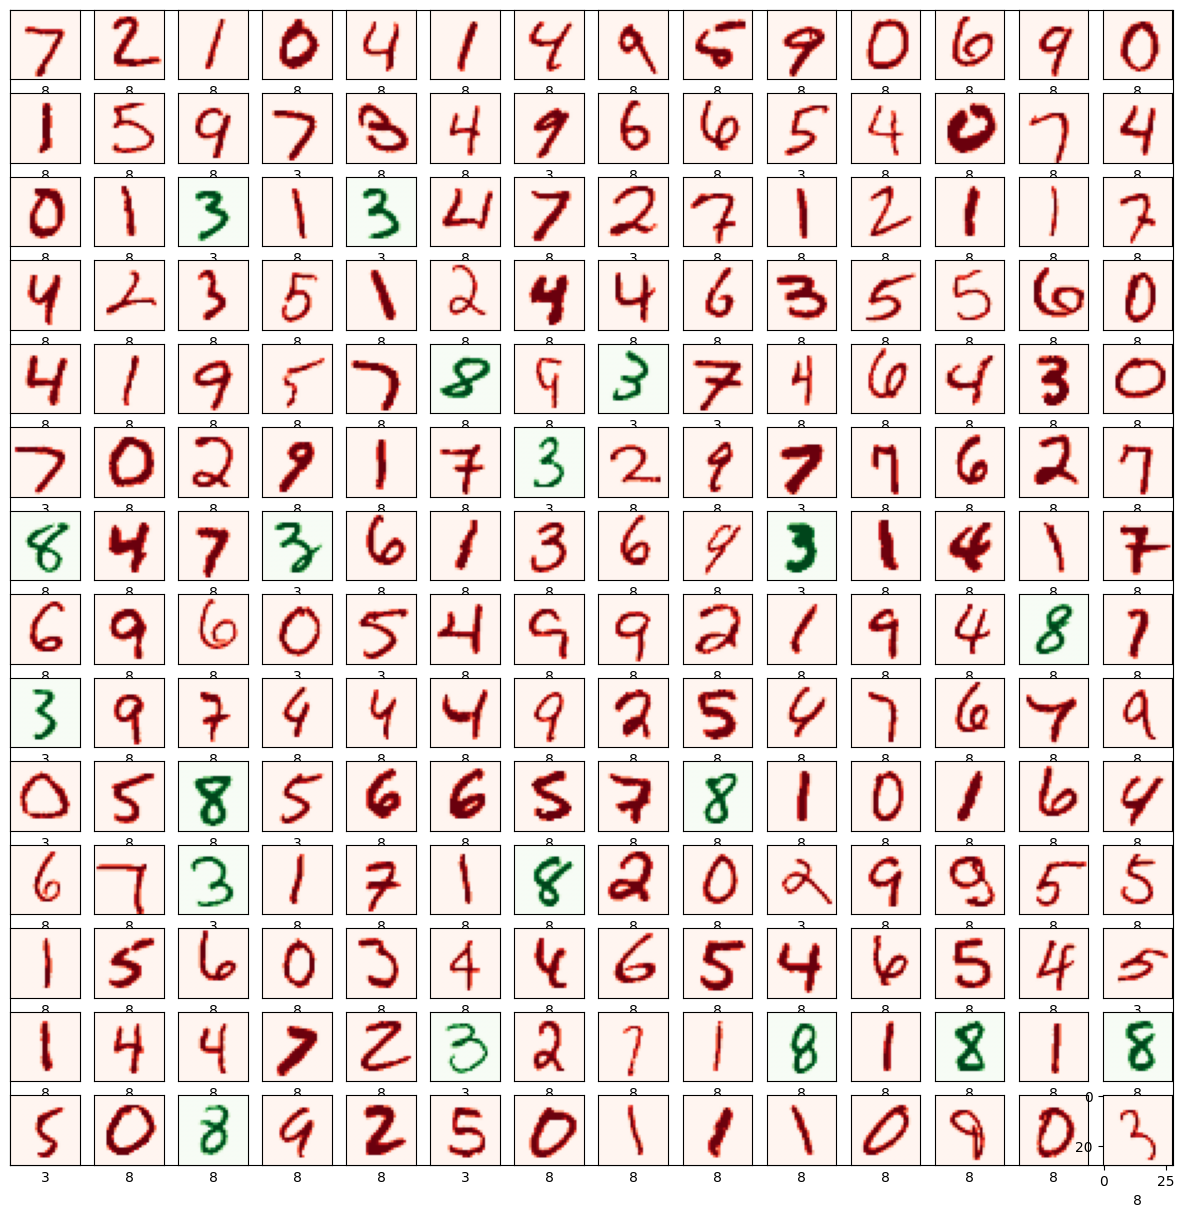

In [34]:
import math # Importing the math module to use functions like math.ceil and math.sqrt

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()